# Building a Brain Tumor Classifier using CNN

In [2]:
import keras
import tensorflow as tf

### Dividing the training data into two parts
- Training
- Validation

In [3]:
train_ds, val_ds = keras.preprocessing.image_dataset_from_directory(
    'Training',
    validation_split = 0.2, # 20%
    subset = 'both',
    seed = 100,
    image_size = (128, 128),
    batch_size = 16,
)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Using 1142 files for validation.


In [4]:
classes = train_ds.class_names
classes

['glioma', 'meningioma', 'notumor', 'pituitary']

### Visualizing the data
First 16 images (1 batch) of the training set

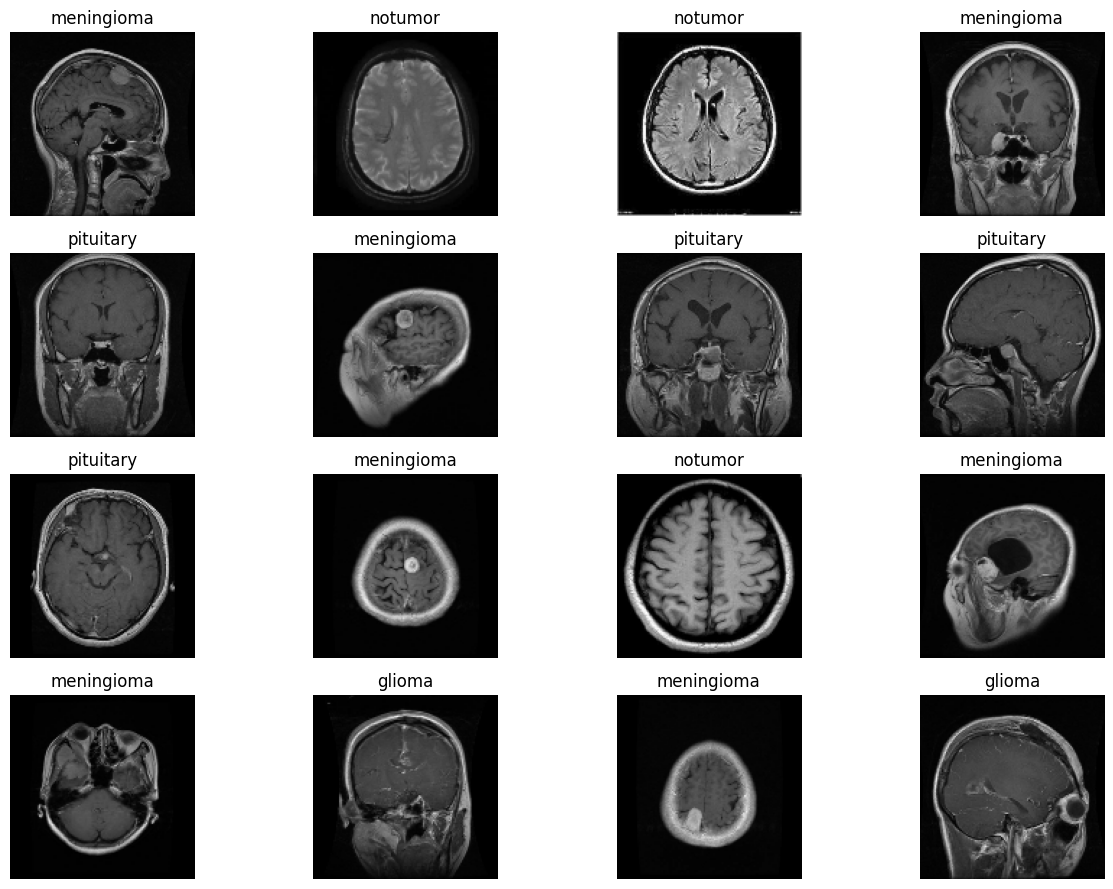

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x, y = next(train_ds.as_numpy_iterator())
def plot_images(x, y):
    plt.figure(figsize=[15, 11])
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(np.array(x[i]).astype('uint8'))
        plt.title(classes[y[i]])
        plt.axis("off")
        

plot_images(x,y)

### Standardizing the dataset

In [50]:
for image_batch, _ in train_ds:
    print(image_batch.shape)
    break

(16, 128, 128, 3)


As we can see here that our last dimension which refers to the color channels is RGB i.e 3. The RGB channel values are in the range [0,255]

In [71]:
image_batch, labels_batch = next(iter(train_ds))
print("Min: ",np.min(image_batch[0]), "Max: ",np.max(image_batch[0]))

Min:  0.0 Max:  240.9245


This is not ideal for neural networks, so we have to standardize values to be in range [0,1]

In [115]:
normalizaton_layer = keras.layers.Rescaling(1./255)
normalized_train_ds = train_ds.map(lambda x, y: (normalizaton_layer(x), y))
normalized_val_ds = val_ds.map(lambda x, y: (normalizaton_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train_ds))
print("Min: ",np.min(image_batch[0]), "Max: ",np.max(image_batch[0]))
image_batch, labels_batch = next(iter(normalized_val_ds))
print("Min: ",np.min(image_batch[0]), "Max: ",np.max(image_batch[0]))

Min:  0.0 Max:  0.9509804
Min:  0.0 Max:  0.93270916


### Building the Model

In [105]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [112]:
cnn = Sequential([
    #CNN Layers
    #First Layer
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2,2), strides=1),
    Dropout(0.2),
    #Second Layer
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2,2), strides=1),
    Dropout(0.2),
    #Third Layer
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2,2), strides=1),
    Dropout(0.2),
    
    #Dense Layers
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(classes), activation='softmax'),
])

c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [113]:
cnn.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 125, 125, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 125, 125, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 123, 123, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 122, 122, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 122, 122, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 120, 120, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 119, 119, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 119, 119, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 906304)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │    58,003,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,029,780 (221.37 MB)

 Trainable params: 58,029,780 (221.37 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [116]:
history = cnn.fit(normalized_train_ds, validation_data=normalized_val_ds, epochs=5, batch_size=16, verbose=1)

Epoch 1/5
286/286 ━━━━━━━━━━━━━━━━━━━━ 296s 1s/step - accuracy: 0.5424 - loss: 1.3513 - val_accuracy: 0.6673 - val_loss: 0.7542
Epoch 2/5
286/286 ━━━━━━━━━━━━━━━━━━━━ 279s 975ms/step - accuracy: 0.8355 - loss: 0.4234 - val_accuracy: 0.8476 - val_loss: 0.4154
Epoch 3/5
286/286 ━━━━━━━━━━━━━━━━━━━━ 278s 970ms/step - accuracy: 0.8966 - loss: 0.2717 - val_accuracy: 0.8135 - val_loss: 0.5326
Epoch 4/5
286/286 ━━━━━━━━━━━━━━━━━━━━ 280s 977ms/step - accuracy: 0.9396 - loss: 0.1629 - val_accuracy: 0.8940 - val_loss: 0.3593
Epoch 5/5
286/286 ━━━━━━━━━━━━━━━━━━━━ 298s 1s/step - accuracy: 0.9598 - loss: 0.1075 - val_accuracy: 0.8809 - val_loss: 0.3959


In [117]:
test_ds = keras.preprocessing.image_dataset_from_directory(
    'Testing',
    seed = 100,
    image_size = (128, 128),
    batch_size = 16,
)

Found 1311 files belonging to 4 classes.


In [118]:
normalized_test_ds = test_ds.map(lambda x, y: (normalizaton_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train_ds))
print("Min: ",np.min(image_batch[0]), "Max: ",np.max(image_batch[0]))

Min:  0.0 Max:  0.9715687


In [119]:
cnn.evaluate(normalized_test_ds)

82/82 ━━━━━━━━━━━━━━━━━━━━ 22s 261ms/step - accuracy: 0.8881 - loss: 0.3287


[0.34888797998428345, 0.8916857242584229]

In [120]:
epochs = range(len(history.history['accuracy']))
epochs

range(0, 5)

<Figure size 640x480 with 0 Axes>

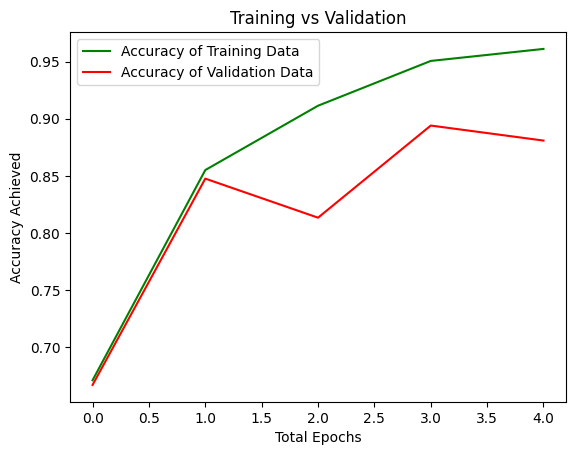

<Figure size 640x480 with 0 Axes>

In [121]:
plt.plot(epochs, history.history['accuracy'], 'green', label='Accuracy of Training Data')
plt.plot(epochs, history.history['val_accuracy'], 'red', label='Accuracy of Validation Data')
plt.xlabel("Total Epochs")
plt.ylabel("Accuracy Achieved")
plt.title("Training vs Validation")
plt.legend(loc='upper left')
plt.figure()

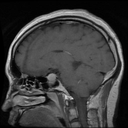

In [145]:
from PIL import Image, ImageOps

data = np.ndarray(shape=(1,128,128,3), dtype=np.uint8)
img = Image.open("test_p.jpg")
size = (128, 128)
img = ImageOps.fit(img, size, Image.LANCZOS)
img_array = np.asarray(img)
display(img)
normalized_img_array = (img_array.astype('uint8') / 127.0) - 1
data[0] = normalized_img_array

In [146]:
prediction = cnn.predict(data)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[0. 0. 0. 1.]]
